# Setup & Import Libraries

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
import os
import numpy as np
import pandas as pd
import datetime

import tensorflow as tf

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Download the Dataset

In [3]:
files.upload() #upload kaggle.json.

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"neemias","key":"53f4c36571265047263a8cb7ab9386e0"}'}

In [4]:
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d theforcecoder/wind-power-forecasting
!unzip wind-power-forecasting.zip

os.remove('wind-power-forecasting.zip')  

  0% 0.00/7.51M [00:00<?, ?B/s]
100% 7.51M/7.51M [00:00<00:00, 106MB/s]
Archive:  wind-power-forecasting.zip
  inflating: Turbine_Data.csv        


# Load Dataset

In [5]:
df = pd.read_csv('Turbine_Data.csv', parse_dates = True, header = 0)

In [6]:
df.head()

,Unnamed: 0,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
0,2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
1,2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2,2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
3,2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
4,2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN


In [7]:
df.shape

(118224, 22)

# Exploratory Data Analysis

In [8]:
df.describe()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,94750.000000,93817.000000,62518.000000,41996.000000,41891.000000,41891.000000,62160.0,62540.000000,62438.000000,62295.000000,62427.000000,62449.000000,62406.000000,62507.000000,72278.000000,94748.000000,62127.000000,6.290800e+04,72278.000000,94595.000000
mean,619.109805,28.774654,43.010189,9.749641,10.036535,10.036535,0.0,64.234170,57.561217,1102.026269,72.460403,71.826659,36.897978,39.547603,196.290539,88.133966,9.907500,2.280429e+03,196.290539,5.878960
std,611.275373,4.369145,5.545312,20.644828,20.270465,20.270465,0.0,10.455556,6.323895,528.063946,22.627489,22.650255,5.178711,5.732783,88.296554,116.596725,4.718421,3.586034e+05,88.296554,2.619084
min,-38.524659,0.000000,0.000000,-43.156734,-26.443415,-26.443415,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-203.182591,0.000000,0.000000e+00,0.000000,0.000000
25%,79.642258,25.627428,39.840247,-0.939849,-0.433264,-0.433264,0.0,57.872242,53.942181,1029.812177,55.492241,54.763998,33.943949,35.812500,145.000000,-0.432137,9.231091,2.000000e+00,145.000000,3.823330
50%,402.654893,28.340541,42.910877,0.394399,0.888977,0.888977,0.0,64.834662,57.196089,1124.860720,65.788800,65.004946,37.003815,39.491310,182.000000,35.883659,10.098702,2.000000e+00,182.000000,5.557765
75%,1074.591780,31.664772,47.007976,8.099302,8.480194,8.480194,0.0,71.079306,61.305312,1515.402005,85.867449,85.337740,40.008425,43.359375,271.000000,147.359075,13.600413,2.000000e+00,271.000000,7.506710
max,1779.032433,42.405597,55.088655,90.143610,90.017830,90.017830,0.0,82.237932,70.764581,1809.941700,126.773031,126.043018,47.996185,54.250000,357.000000,403.713620,16.273495,6.574653e+07,357.000000,22.970893


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118224 entries, 0 to 118223
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    118224 non-null  object 
 1   ActivePower                   94750 non-null   float64
 2   AmbientTemperatue             93817 non-null   float64
 3   BearingShaftTemperature       62518 non-null   float64
 4   Blade1PitchAngle              41996 non-null   float64
 5   Blade2PitchAngle              41891 non-null   float64
 6   Blade3PitchAngle              41891 non-null   float64
 7   ControlBoxTemperature         62160 non-null   float64
 8   GearboxBearingTemperature     62540 non-null   float64
 9   GearboxOilTemperature         62438 non-null   float64
 10  GeneratorRPM                  62295 non-null   float64
 11  GeneratorWinding1Temperature  62427 non-null   float64
 12  GeneratorWinding2Temperature  62449 non-null

**Handle with missing values**

In [10]:
df.isnull().sum()

Unnamed: 0                          0
ActivePower                     23474
AmbientTemperatue               24407
BearingShaftTemperature         55706
Blade1PitchAngle                76228
Blade2PitchAngle                76333
Blade3PitchAngle                76333
ControlBoxTemperature           56064
GearboxBearingTemperature       55684
GearboxOilTemperature           55786
GeneratorRPM                    55929
GeneratorWinding1Temperature    55797
GeneratorWinding2Temperature    55775
HubTemperature                  55818
MainBoxTemperature              55717
NacellePosition                 45946
ReactivePower                   23476
RotorRPM                        56097
TurbineStatus                   55316
WTG                                 0
WindDirection                   45946
WindSpeed                       23629
dtype: int64

In [11]:
df = df.fillna(method="ffill").fillna(method="bfill")

In [12]:
df.isnull().sum()

Unnamed: 0                      0
ActivePower                     0
AmbientTemperatue               0
BearingShaftTemperature         0
Blade1PitchAngle                0
Blade2PitchAngle                0
Blade3PitchAngle                0
ControlBoxTemperature           0
GearboxBearingTemperature       0
GearboxOilTemperature           0
GeneratorRPM                    0
GeneratorWinding1Temperature    0
GeneratorWinding2Temperature    0
HubTemperature                  0
MainBoxTemperature              0
NacellePosition                 0
ReactivePower                   0
RotorRPM                        0
TurbineStatus                   0
WTG                             0
WindDirection                   0
WindSpeed                       0
dtype: int64

In [13]:
df.describe()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.0,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,1.182240e+05,118224.000000,118224.000000
mean,639.934548,28.574250,44.966830,31.797893,30.718228,30.718228,0.0,68.885245,60.146597,1359.868503,87.239668,86.582197,38.700162,40.595611,201.719506,84.387076,12.199976,1.239299e+03,201.719506,6.031632
std,630.144323,4.308120,6.404031,22.150405,21.173546,21.173546,0.0,11.675803,5.812945,527.578035,25.175172,25.170463,5.820204,5.925493,90.954878,116.505296,4.737852,2.615880e+05,90.954878,2.819626
min,-38.524659,0.000000,0.000000,-43.156734,-26.443415,-26.443415,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-203.182591,0.000000,0.000000e+00,0.000000,0.000000
25%,70.595235,25.531339,41.608761,1.737424,2.209115,2.209115,0.0,62.865522,56.353738,1049.551193,62.588232,61.782429,35.994478,38.270834,145.000000,-0.502655,9.410517,0.000000e+00,145.000000,3.866613
50%,423.445880,28.126315,47.901936,45.736893,43.699357,43.699357,0.0,75.066281,63.304417,1691.274462,98.608170,97.978180,39.996185,41.898426,188.000000,28.384563,15.160864,2.000000e+00,188.000000,5.672165
75%,1155.626617,31.261132,47.901936,45.736893,43.699357,43.699357,0.0,77.119133,64.204399,1751.715563,113.290871,112.592163,42.996094,44.000000,280.000000,137.433198,15.708135,2.000000e+00,280.000000,7.791896
max,1779.032433,42.405597,55.088655,90.143610,90.017830,90.017830,0.0,82.237932,70.764581,1809.941700,126.773031,126.043018,47.996185,54.250000,357.000000,403.713620,16.273495,6.574653e+07,357.000000,22.970893


**We can see in describe method that features: `Blade2PitchAngle` and `Blade3PitchAngle` having the same values for descritive stat. So we can drop one column**

In [14]:
def handle_equals_values(feature_1, feature_2):
    global df
    if (df[feature_1].equals(df[feature_2]) == True):
        df = df.drop(feature_2, axis=1)

In [15]:
handle_equals_values("Blade2PitchAngle", "Blade3PitchAngle")

In [16]:
df.describe()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.0,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,118224.000000,1.182240e+05,118224.000000,118224.000000
mean,639.934548,28.574250,44.966830,31.797893,30.718228,0.0,68.885245,60.146597,1359.868503,87.239668,86.582197,38.700162,40.595611,201.719506,84.387076,12.199976,1.239299e+03,201.719506,6.031632
std,630.144323,4.308120,6.404031,22.150405,21.173546,0.0,11.675803,5.812945,527.578035,25.175172,25.170463,5.820204,5.925493,90.954878,116.505296,4.737852,2.615880e+05,90.954878,2.819626
min,-38.524659,0.000000,0.000000,-43.156734,-26.443415,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-203.182591,0.000000,0.000000e+00,0.000000,0.000000
25%,70.595235,25.531339,41.608761,1.737424,2.209115,0.0,62.865522,56.353738,1049.551193,62.588232,61.782429,35.994478,38.270834,145.000000,-0.502655,9.410517,0.000000e+00,145.000000,3.866613
50%,423.445880,28.126315,47.901936,45.736893,43.699357,0.0,75.066281,63.304417,1691.274462,98.608170,97.978180,39.996185,41.898426,188.000000,28.384563,15.160864,2.000000e+00,188.000000,5.672165
75%,1155.626617,31.261132,47.901936,45.736893,43.699357,0.0,77.119133,64.204399,1751.715563,113.290871,112.592163,42.996094,44.000000,280.000000,137.433198,15.708135,2.000000e+00,280.000000,7.791896
max,1779.032433,42.405597,55.088655,90.143610,90.017830,0.0,82.237932,70.764581,1809.941700,126.773031,126.043018,47.996185,54.250000,357.000000,403.713620,16.273495,6.574653e+07,357.000000,22.970893


# Preprocessing

**Add date for `Unnamed: 0` column.**



In [17]:
df["Unnamed: 0"] = pd.to_datetime(df["Unnamed: 0"])
df.rename(columns={"Unnamed: 0": "date"}, inplace=True)

In [18]:
df.head()

,date,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
0,2017-12-31 00:00:00+00:00,-5.357727,23.148729,47.901936,45.736893,43.699357,0.0,77.119133,64.204399,1751.715563,...,112.592163,42.996094,41.898426,8.0,-9.96083,15.708135,0.0,G01,8.0,2.279088
1,2017-12-31 00:10:00+00:00,-5.357727,23.148729,47.901936,45.736893,43.699357,0.0,77.119133,64.204399,1751.715563,...,112.592163,42.996094,41.898426,8.0,-9.96083,15.708135,0.0,G01,8.0,2.279088
2,2017-12-31 00:20:00+00:00,-5.357727,23.148729,47.901936,45.736893,43.699357,0.0,77.119133,64.204399,1751.715563,...,112.592163,42.996094,41.898426,8.0,-9.96083,15.708135,0.0,G01,8.0,2.279088
3,2017-12-31 00:30:00+00:00,-5.357727,23.148729,47.901936,45.736893,43.699357,0.0,77.119133,64.204399,1751.715563,...,112.592163,42.996094,41.898426,8.0,-9.96083,15.708135,0.0,G01,8.0,2.279088
4,2017-12-31 00:40:00+00:00,-5.357727,23.148729,47.901936,45.736893,43.699357,0.0,77.119133,64.204399,1751.715563,...,112.592163,42.996094,41.898426,8.0,-9.96083,15.708135,0.0,G01,8.0,2.279088


In [19]:
df = df.join(pd.get_dummies(df["date"].dt.dayofweek))
df.head()

,date,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,...,WTG,WindDirection,WindSpeed,0,1,2,3,4,5,6
0,2017-12-31 00:00:00+00:00,-5.357727,23.148729,47.901936,45.736893,43.699357,0.0,77.119133,64.204399,1751.715563,...,G01,8.0,2.279088,0,0,0,0,0,0,1
1,2017-12-31 00:10:00+00:00,-5.357727,23.148729,47.901936,45.736893,43.699357,0.0,77.119133,64.204399,1751.715563,...,G01,8.0,2.279088,0,0,0,0,0,0,1
2,2017-12-31 00:20:00+00:00,-5.357727,23.148729,47.901936,45.736893,43.699357,0.0,77.119133,64.204399,1751.715563,...,G01,8.0,2.279088,0,0,0,0,0,0,1
3,2017-12-31 00:30:00+00:00,-5.357727,23.148729,47.901936,45.736893,43.699357,0.0,77.119133,64.204399,1751.715563,...,G01,8.0,2.279088,0,0,0,0,0,0,1
4,2017-12-31 00:40:00+00:00,-5.357727,23.148729,47.901936,45.736893,43.699357,0.0,77.119133,64.204399,1751.715563,...,G01,8.0,2.279088,0,0,0,0,0,0,1


In [20]:
df = df[['date', 'ActivePower', 'WindSpeed', 'GeneratorRPM', 'ReactivePower', 'RotorRPM', 'AmbientTemperatue', \
                 'WindDirection', 'Blade1PitchAngle', 'Blade2PitchAngle', 'HubTemperature', 'MainBoxTemperature', 'GearboxBearingTemperature', \
                 'GearboxOilTemperature']].copy()

**Transform the `date` column into periodicity using sin and cos for days and years.**

In [21]:
day = 24*60*60
year = 365.2425*day

df['weekday'] = df['date'].dt.dayofweek
ohe = pd.get_dummies(df['weekday'])
df = df.join(ohe)
df = df.drop('weekday', axis=1)
date = pd.to_datetime(df.pop('date'))

timestamp_s = date.map(datetime.datetime.timestamp)

df["sin_day"] = np.sin(timestamp_s * (2 * np.pi / day))
df["cos_day"] = np.cos(timestamp_s * (2 * np.pi / day))
df["sin_year"] = np.sin(timestamp_s * (2 * np.pi / year))
df["cos_year"] = np.cos(timestamp_s * (2 * np.pi / year))

In [22]:
df.head()

,ActivePower,WindSpeed,GeneratorRPM,ReactivePower,RotorRPM,AmbientTemperatue,WindDirection,Blade1PitchAngle,Blade2PitchAngle,HubTemperature,...,1,2,3,4,5,6,sin_day,cos_day,sin_year,cos_year
0,-5.357727,2.279088,1751.715563,-9.96083,15.708135,23.148729,8.0,45.736893,43.699357,42.996094,...,0,0,0,0,0,1,-6.688386e-12,1.000000,-0.011010,0.999939
1,-5.357727,2.279088,1751.715563,-9.96083,15.708135,23.148729,8.0,45.736893,43.699357,42.996094,...,0,0,0,0,0,1,4.361939e-02,0.999048,-0.010890,0.999941
2,-5.357727,2.279088,1751.715563,-9.96083,15.708135,23.148729,8.0,45.736893,43.699357,42.996094,...,0,0,0,0,0,1,8.715574e-02,0.996195,-0.010771,0.999942
3,-5.357727,2.279088,1751.715563,-9.96083,15.708135,23.148729,8.0,45.736893,43.699357,42.996094,...,0,0,0,0,0,1,1.305262e-01,0.991445,-0.010651,0.999943
4,-5.357727,2.279088,1751.715563,-9.96083,15.708135,23.148729,8.0,45.736893,43.699357,42.996094,...,0,0,0,0,0,1,1.736482e-01,0.984808,-0.010532,0.999945


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118224 entries, 0 to 118223
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ActivePower                118224 non-null  float64
 1   WindSpeed                  118224 non-null  float64
 2   GeneratorRPM               118224 non-null  float64
 3   ReactivePower              118224 non-null  float64
 4   RotorRPM                   118224 non-null  float64
 5   AmbientTemperatue          118224 non-null  float64
 6   WindDirection              118224 non-null  float64
 7   Blade1PitchAngle           118224 non-null  float64
 8   Blade2PitchAngle           118224 non-null  float64
 9   HubTemperature             118224 non-null  float64
 10  MainBoxTemperature         118224 non-null  float64
 11  GearboxBearingTemperature  118224 non-null  float64
 12  GearboxOilTemperature      118224 non-null  float64
 13  0                          11

# Split the Data into 70% (Train), 10% (Validation), and 20% (Test)

In [24]:
column_indices = {name: i for i, name in enumerate(df.columns)}
train_df = df[0: int(len(df)*0.7)]
val_df = df[int(len(df)*0.7): int(len(df)*0.8)]
test_df = df[int(len(df)*0.8):]

In [25]:
print("Number of Samples")
print(f"Train: {len(train_df)}, Validation: {len(val_df)}, Test: {len(test_df)}")

Number of Samples
Train: 82756, Validation: 11823, Test: 23645


In [26]:
n_features = df.shape[1]
print(f"Number of features: {n_features}")

Number of features: 24


# Normalize the data

In [27]:
mean, std = train_df.mean(), train_df.std()

train_df = (train_df - mean) / std
val_df = (val_df - mean) / std
test_df = (test_df - mean) / std

# Build Dataset Generator

In [28]:
class DatasetGenerator():
    def __init__(self, input_width, label_width, shift,
                 train_df, val_df, test_df, label_columns=None):
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        self.label_columns = label_columns
        if (label_columns is not None):
            self.label_columns_indices = {name: i for i, name in
                                          enumerate(label_columns)}
        self.column_indices = {
            name:i for i, name in enumerate(train_df.columns)
        }

        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift
        self.total_window_size = input_width + shift
        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1)

        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels

    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=128,)

        ds = ds.map(self.split_window)

        return ds
  
    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def example(self):
        """Get and cache an example batch of `inputs, labels` for plotting."""
        result = getattr(self, '_example', None)
        if result is None:
            # No example batch was found, so get one from the `.train` dataset
            result = next(iter(self.train))
            # And cache it for next time
            self._example = result
        return result

    
    def plot(self, model=None, plot_col='ActivePower', max_subplots=5):
        inputs, labels = self.example
        plt.figure(figsize=(70, 20))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(max_n, 1, n+1)
            plt.ylabel(f'{plot_col} [normed]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                    label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', label='Labels', c='#2ca02c', s=124)
            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                        marker='X', label='Predictions',
                        c='#ff0000', s=154)

            if n == 0:
                plt.legend(prop={'size': 20})

        plt.xlabel('Time [20 min]')


In [29]:
predict_15_days = 15*24*6

dg = DatasetGenerator(input_width=30*24*6, train_df=train_df, val_df=val_df, 
                      test_df=test_df, label_width=predict_15_days, 
                      shift=predict_15_days, label_columns=["ActivePower"])

In [30]:
example_window = tf.stack([np.array(train_df[:dg.total_window_size]),
                           np.array(train_df[100:100+dg.total_window_size]),
                           np.array(train_df[200:200+dg.total_window_size])])


example_inputs, example_labels = dg.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 6480, 24)
Inputs shape: (3, 4320, 24)
labels shape: (3, 2160, 1)


In [31]:
dg.train.element_spec

(TensorSpec(shape=(None, 4320, 24), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 2160, 1), dtype=tf.float32, name=None))

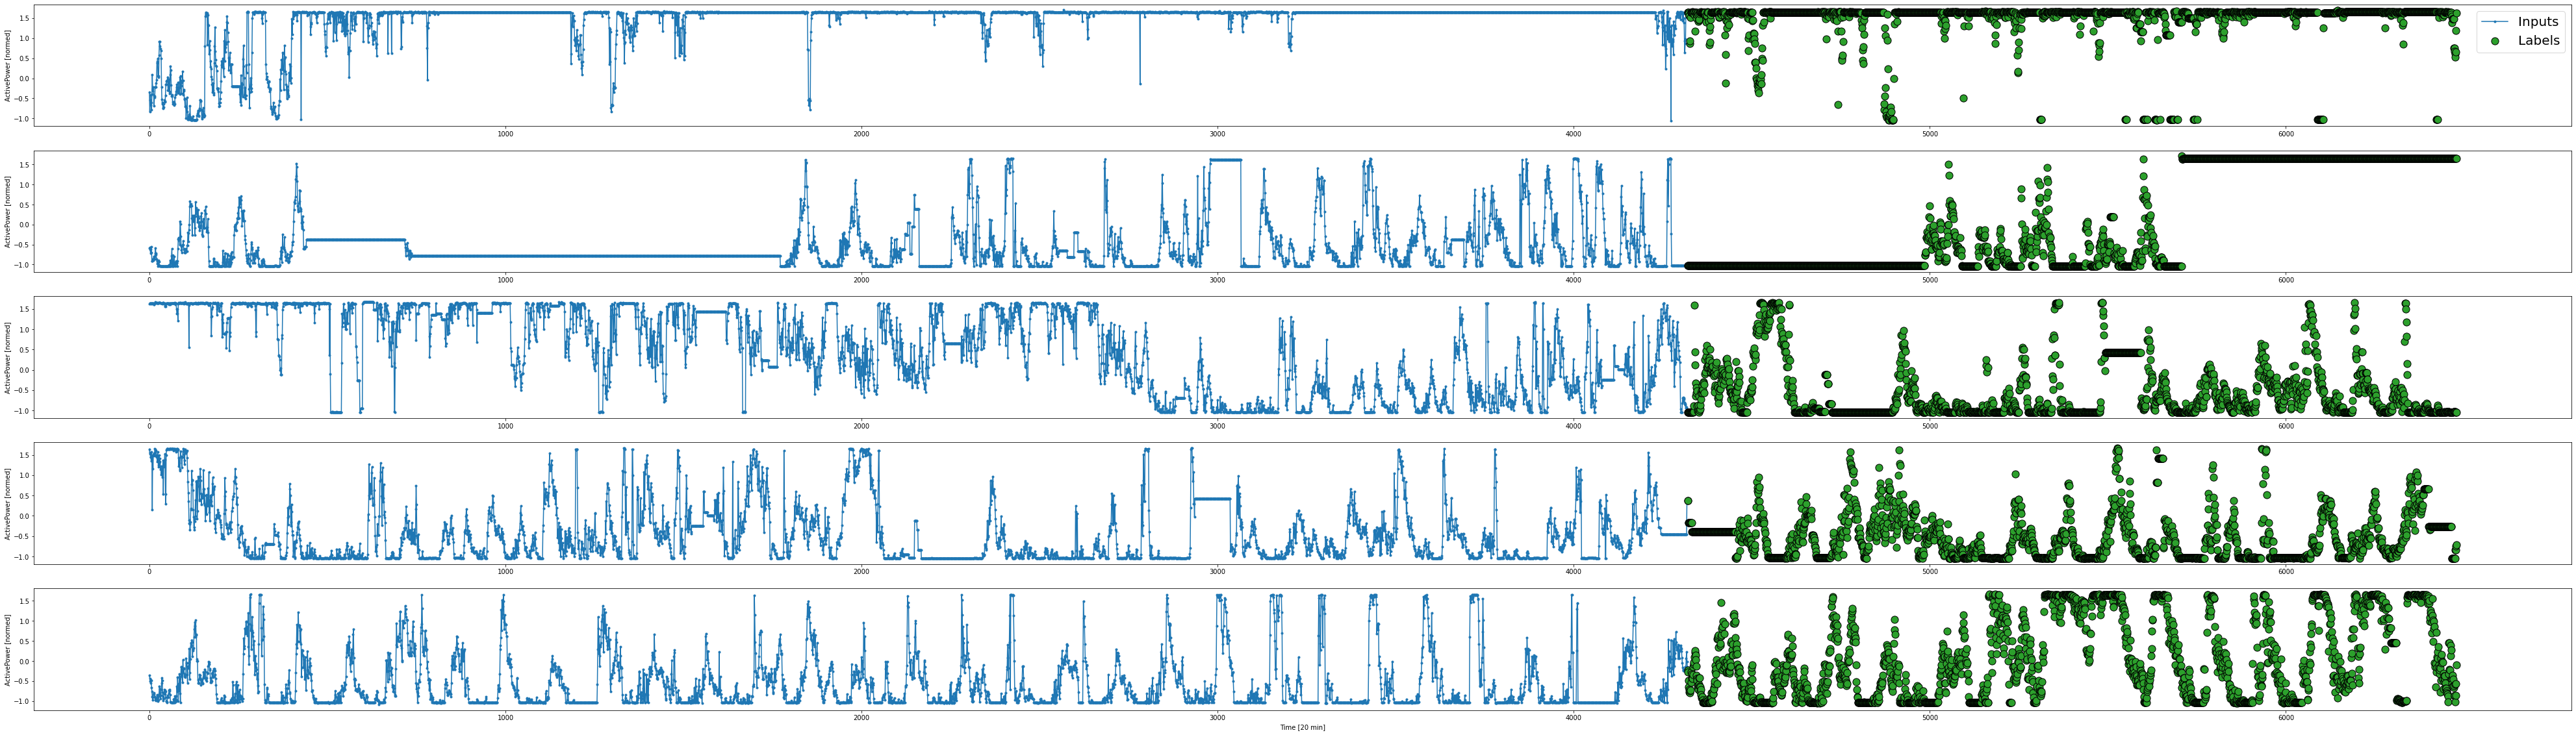

In [32]:
dg.plot()

# Build, Compile, and Fit the Model

In [65]:
def get_model():    
    model.add(tf.keras.layers.LSTM(64, return_sequences=True))
    model.add(tf.keras.layers.LSTM(64, return_sequences=False))
    model.add(tf.keras.layers.Dense(predict_15_days*n_features, kernel_initializer=tf.initializers.zeros()))
    model.add(tf.keras.layers.Reshape([int(predict_15_days), n_features]))
    return model

In [66]:
model = get_model()

In [67]:
model.compile(loss=tf.losses.MeanAbsoluteError(),
                optimizer=tf.optimizers.Adam(learning_rate=0.001),
                metrics=[tf.metrics.MeanAbsoluteError()])

In [ ]:
history = model.fit(dg.train, epochs=10, validation_data=dg.val)

Epoch 1/10
439/596 [=====================>........] - ETA: 39:00 - loss: 0.5978 - mean_absolute_error: 0.5978

In [ ]:
def plot_history(history: dict, n_epochs=10):
    epochs = [i for i in range(n_epochs)]
    fig , ax = plt.subplots(1,2)
    train_mae = history["mean_absolute_error"]
    train_loss = history["loss"]
    test_mae = history["val_mean_absolute_error"]
    test_loss = history["val_loss"]
    
    fig.set_size_inches(30,12)
    ax[0].plot(epochs, train_loss, label="Training Loss")
    ax[0].plot(epochs, test_loss, label="Validation Loss")
    ax[0].set_title("Training & Validation Loss")
    ax[0].legend()
    ax[0].set_xlabel("Epochs")

    ax[1].plot(epochs, train_mae, label="Training MAE")
    ax[1].plot(epochs, test_mae, label="Validation MAE")
    ax[1].set_title("Training & Validation Mean Absolute Error")
    ax[1].legend()
    ax[1].set_xlabel("Epochs")

    plt.show()

In [ ]:
plot_history(history.history)